# Some installation and packages

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import zipfile
import os

import torchvision.transforms as transforms

import argparse
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.autograd import Variable
from tqdm import tqdm

import argparse
from tqdm import tqdm
import os
import PIL.Image as Image

import keras 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import History
import numpy as np



import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras import models, regularizers
from keras import layers
from keras import optimizers
from keras import callbacks


In [ ]:
from google.colab import drive,files
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# Personnal Method

We do not really know how the split was made between the validation dataset and the training dataset and therefore I decided to merge the train_images and the val_images files into a new file named train_and_val where we will operate the split randomly.

In [ ]:


train_dir = "/content/gdrive/My Drive/bird_dataset/train_images"
val_dir = "/content/gdrive/My Drive/bird_dataset/val_images"
train_val_dir='/content/gdrive/My Drive/bird_dataset/train_and_val'
test_dir = "/content/gdrive/My Drive/bird_dataset/test_images"

dico_img={}
name_class=[]
for i in os.listdir(train_val_dir):
  name_class+=[i]
  dico_img[i]=["/content/gdrive/My Drive/bird_dataset/train_and_val" + '/' + i + '/' '{}'.format(j) for j in os.listdir(train_val_dir + '/' + i)]


031.Black_billed_Cuckoo


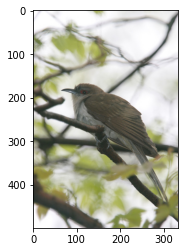

029.American_Crow


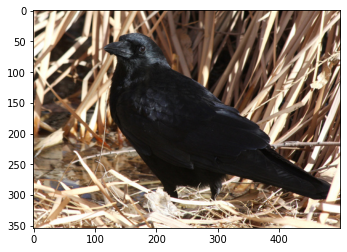

010.Red_winged_Blackbird


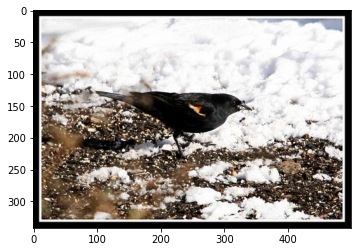

034.Gray_crowned_Rosy_Finch


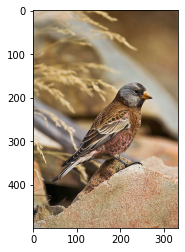

013.Bobolink


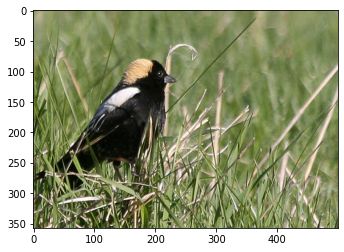

004.Groove_billed_Ani


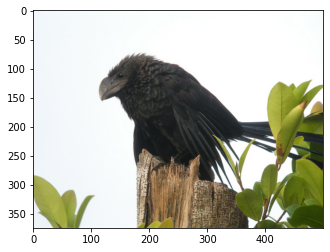

015.Lazuli_Bunting


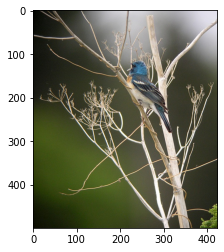

026.Bronzed_Cowbird


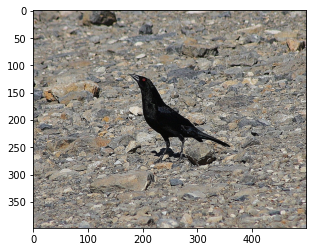

023.Brandt_Cormorant


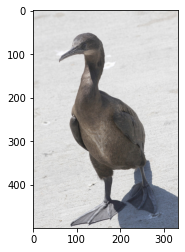

021.Eastern_Towhee


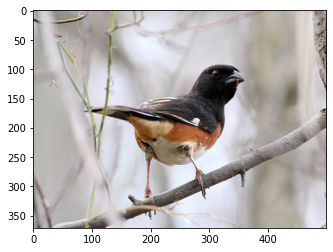

009.Brewer_Blackbird


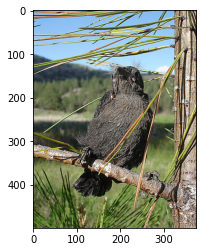

011.Rusty_Blackbird


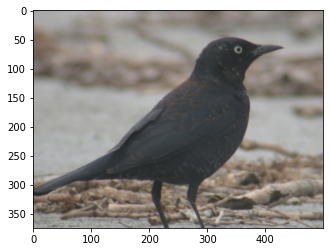

014.Indigo_Bunting


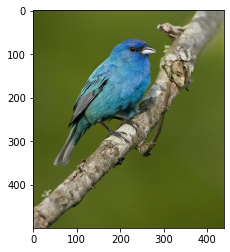

020.Yellow_breasted_Chat


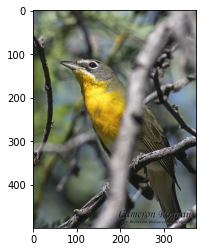

019.Gray_Catbird


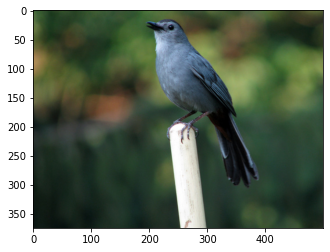

012.Yellow_headed_Blackbird


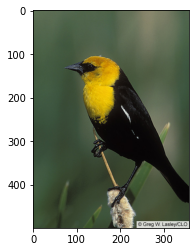

033.Yellow_billed_Cuckoo


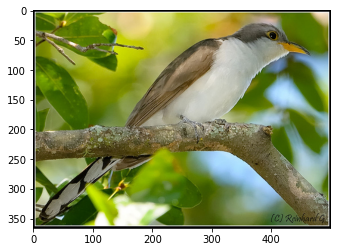

028.Brown_Creeper


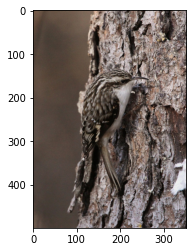

016.Painted_Bunting


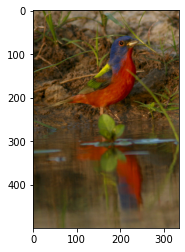

030.Fish_Crow


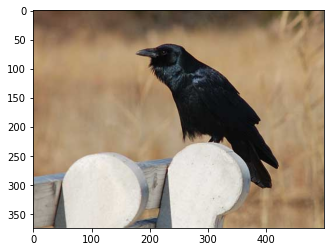

In [ ]:

for k in dico_img:
  print(k)
  for image in dico_img[k][0:1]:
    img=mpimg.imread(image)
    plt.imshow(img)
    plt.show()


In [ ]:
m=sum([len(dico_img[i]) for i in dico_img])
for i in dico_img:
  print(f"The class {i} has {len(dico_img[i])} instances ({np.round(len(dico_img[i])/m,2)*100}%)")
print(f'There are {m} instances in the database')

The class 031.Black_billed_Cuckoo has 60 instances (5.0%)
The class 029.American_Crow has 60 instances (5.0%)
The class 010.Red_winged_Blackbird has 60 instances (5.0%)
The class 034.Gray_crowned_Rosy_Finch has 59 instances (5.0%)
The class 013.Bobolink has 60 instances (5.0%)
The class 004.Groove_billed_Ani has 60 instances (5.0%)
The class 015.Lazuli_Bunting has 58 instances (5.0%)
The class 026.Bronzed_Cowbird has 60 instances (5.0%)
The class 023.Brandt_Cormorant has 59 instances (5.0%)
The class 021.Eastern_Towhee has 60 instances (5.0%)
The class 009.Brewer_Blackbird has 59 instances (5.0%)
The class 011.Rusty_Blackbird has 60 instances (5.0%)
The class 014.Indigo_Bunting has 60 instances (5.0%)
The class 020.Yellow_breasted_Chat has 59 instances (5.0%)
The class 019.Gray_Catbird has 59 instances (5.0%)
The class 012.Yellow_headed_Blackbird has 56 instances (5.0%)
The class 033.Yellow_billed_Cuckoo has 59 instances (5.0%)
The class 028.Brown_Creeper has 59 instances (5.0%)
The cl

Each split contains approximatively the same number of samples from each class: it is a balanced classification problem, which means classification accuracy will be an appropriate measure of success.

## Naive Method

In [ ]:
img_width,img_height=150,150
batch_size=12

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.42)


train_generator = datagen.flow_from_directory(
        train_val_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')

val_generator = datagen.flow_from_directory(
        train_val_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')

Found 696 images belonging to 20 classes.
Found 489 images belonging to 20 classes.


In [ ]:
input_shape=(img_width,img_height,3)


model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(20, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [ ]:
history=History()

model.fit_generator(
    train_generator,
    steps_per_epoch=58,
    epochs=30, callbacks= [history],
    validation_data=val_generator,
    validation_steps=40
)

Epoch 1/30
58/58 [==============================] - 34s 585ms/step - loss: 3.0038 - acc: 0.0402 - val_loss: 2.9830 - val_acc: 0.0958
Epoch 2/30
58/58 [==============================] - 7s 126ms/step - loss: 2.9535 - acc: 0.1149 - val_loss: 2.9072 - val_acc: 0.1250
Epoch 3/30
58/58 [==============================] - 7s 127ms/step - loss: 2.8248 - acc: 0.1365 - val_loss: 2.7872 - val_acc: 0.1437
Epoch 4/30
58/58 [==============================] - 7s 127ms/step - loss: 2.6370 - acc: 0.2184 - val_loss: 2.6498 - val_acc: 0.2208
Epoch 5/30
58/58 [==============================] - 7s 126ms/step - loss: 2.4054 - acc: 0.2945 - val_loss: 2.5434 - val_acc: 0.2333
Epoch 6/30
58/58 [==============================] - 7s 126ms/step - loss: 2.1678 - acc: 0.3606 - val_loss: 2.6214 - val_acc: 0.2146
Epoch 7/30
58/58 [==============================] - 7s 128ms/step - loss: 1.9670 - acc: 0.3937 - val_loss: 2.4844 - val_acc: 0.2458
Epoch 8/30
58/58 [==============================] - 7s 127ms/step - loss: 1

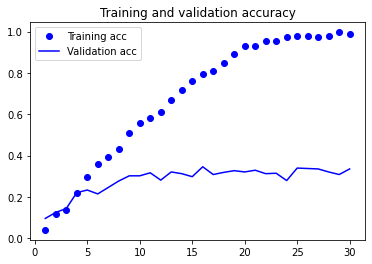

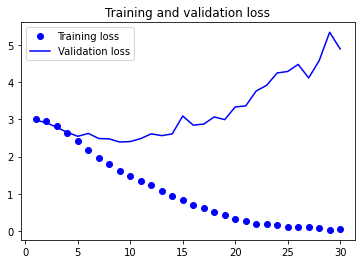

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 30%. This bad results can be explained because we do not have enough samples (only around 700 hundreds for training) and we face an overfitting issue. 

## Data Augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice

In [ ]:
batch_size=12


datagen = ImageDataGenerator(
rotation_range=30, #value in degrees (0–180), a range within which to randomly rotate pictures.
width_shift_range=0.2,  #ranges within which to randomly translate pictures  horizontally.
height_shift_range=0.2, #ranges within which to randomly translate pictures  vertically.
#zoom_range=0.2, #randomly zooming inside pictures.
horizontal_flip=False, #randomly flipping half the images horizontally—
validation_split=0.42,
fill_mode='nearest')



train_generator = datagen.flow_from_directory(
        train_val_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')

val_generator = datagen.flow_from_directory(
        train_val_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')




In [ ]:
input_shape=(img_width,img_height,3)


model2 = models.Sequential() 
model2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu')) 
model2.add(layers.Dense(20, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
                      metrics=['acc'])

In [ ]:

history=History()

model2.fit_generator(
    train_generator,
    steps_per_epoch=58,
    epochs=100, callbacks= [history],
    validation_data=val_generator,
    validation_steps=40
)

Epoch 1/100
58/58 [==============================] - 12s 215ms/step - loss: 6.8291 - acc: 0.0704 - val_loss: 3.1643 - val_acc: 0.0875
Epoch 2/100
58/58 [==============================] - 12s 211ms/step - loss: 3.1251 - acc: 0.0790 - val_loss: 3.0801 - val_acc: 0.0812
Epoch 3/100
58/58 [==============================] - 12s 212ms/step - loss: 2.9737 - acc: 0.0977 - val_loss: 2.9155 - val_acc: 0.1229
Epoch 4/100
58/58 [==============================] - 13s 217ms/step - loss: 2.8687 - acc: 0.1236 - val_loss: 2.8255 - val_acc: 0.1667
Epoch 5/100
58/58 [==============================] - 12s 209ms/step - loss: 2.8099 - acc: 0.1293 - val_loss: 2.8082 - val_acc: 0.1562
Epoch 6/100
58/58 [==============================] - 12s 207ms/step - loss: 2.7227 - acc: 0.1739 - val_loss: 2.7717 - val_acc: 0.1937
Epoch 7/100
58/58 [==============================] - 12s 209ms/step - loss: 2.6728 - acc: 0.1925 - val_loss: 2.7292 - val_acc: 0.1833
Epoch 8/100
58/58 [==============================] - 12s 210ms

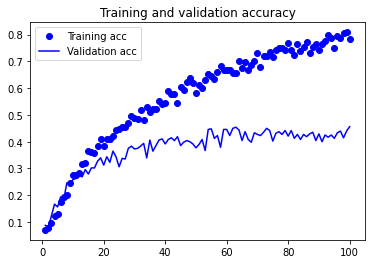

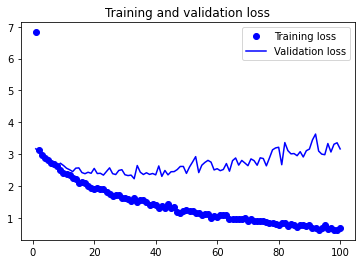

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

It seems that we have improve the overfitting situation and a litte bit the accuracy (around 40%)  but it is not good enough and it has to do with the few samples of data we have. We could tune the parameters (such as the number of filters per convolution layer, or the number of layers in the network) but it would improve as much as we want the accuracy

# Model pretrained

We will start by using the VGG16 architecture pretrained for ImageNet.

In [ ]:
from keras.applications import VGG16, Xception,ResNet50,InceptionResNetV2
import  keras.applications.resnet 

input_shape=(224,224,3)

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

conv_base2=Xception(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

conv_base3=InceptionResNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)




In [ ]:
len(conv_base2.layers)

132

Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were pre- viously learned by the convolutional base will be modified during training. Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned. It is what we do in the cell below

In [ ]:

conv_base.trainable = True
set_trainable=False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False



In [ ]:
conv_base2.trainable=False
conv_base3.trainable=False


model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten()) 
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(20, activation='softmax'))


crop_traindir='/content/gdrive/MyDrive/bird_dataset/cropped/train_images'
crop_testdir='/content/gdrive/MyDrive/bird_dataset/cropped/test_images'
crop_valdir='/content/gdrive/MyDrive/bird_dataset/cropped/val_images'

batch_size=16
n_of_train_sample=1082
n_of_val_sample=103
steps_epoch=int(n_of_train_sample/batch_size)
steps_val_epoch=int(n_of_val_sample/batch_size)

train_datagen = ImageDataGenerator( rescale=1./255,
                                   rotation_range=40, 
                                   #width_shift_range=0.2, 
                                   #height_shift_range=0.2,
                                   #horizontal_flip=False,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(crop_traindir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( crop_valdir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

callbacks_list = [
                  keras.callbacks.EarlyStopping(
                      monitor='val_acc',
                      patience=5,
                      ),
                  callbacks.ReduceLROnPlateau(
                      monitor='val_loss',
                      factor=0.3, 
                      patience=2,
                  )
]

model3.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history = model3.fit( train_generator,
      steps_per_epoch=steps_epoch,
      epochs=18,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=steps_val_epoch)



Found 1076 images belonging to 20 classes.
Found 103 images belonging to 20 classes.
Epoch 1/18
67/67 [==============================] - 721s 11s/step - loss: 3.0359 - acc: 0.0557 - val_loss: 2.9456 - val_acc: 0.1042
Epoch 2/18
67/67 [==============================] - 17s 254ms/step - loss: 2.7986 - acc: 0.1642 - val_loss: 2.7556 - val_acc: 0.1458
Epoch 3/18
67/67 [==============================] - 17s 254ms/step - loss: 2.4697 - acc: 0.2840 - val_loss: 2.5601 - val_acc: 0.2500
Epoch 4/18
67/67 [==============================] - 17s 253ms/step - loss: 2.0254 - acc: 0.4208 - val_loss: 2.2013 - val_acc: 0.3333
Epoch 5/18
67/67 [==============================] - 17s 253ms/step - loss: 1.6050 - acc: 0.5434 - val_loss: 1.8439 - val_acc: 0.4271
Epoch 6/18
67/67 [==============================] - 17s 253ms/step - loss: 1.3043 - acc: 0.6330 - val_loss: 1.7908 - val_acc: 0.4583
Epoch 7/18
67/67 [==============================] - 17s 253ms/step - loss: 1.0461 - acc: 0.6981 - val_loss: 1.5514 - v

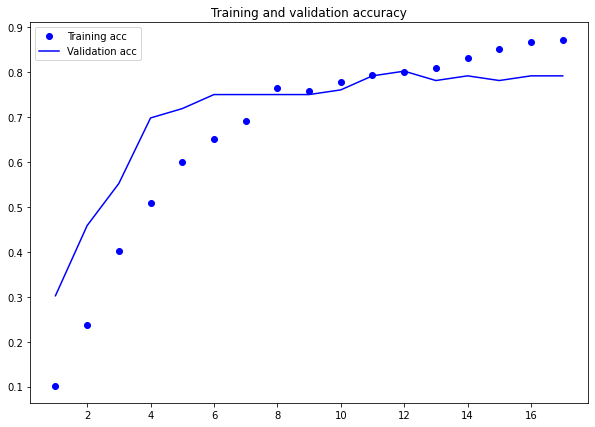

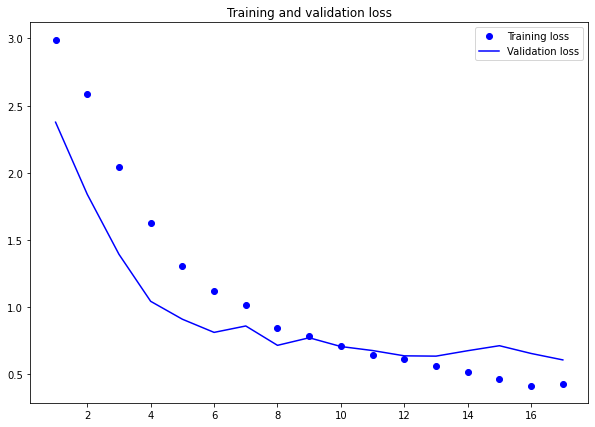

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix

import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Y_pred = model3.predict_generator(validation_generator, n_of_val_sample // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm=confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, list(range(20)))